# Renewable Energy Adoption Predictor 🌍⚡
### SDG 7: Affordable and Clean Energy

This notebook predicts renewable energy adoption rates using machine learning to support progress toward **Sustainable Development Goal 7: Affordable and Clean Energy**.

---



Renewable Energy Adoption Predictor
SDG 7: Affordable and Clean Energy

In [2]:
'''This project predicts renewable energy adoption rates using supervised learning
to help countries plan their clean energy transition.'''

'This project predicts renewable energy adoption rates using supervised learning\nto help countries plan their clean energy transition.'

In [11]:
'''Dataset: Global Data on Sustainable Energy (2000-2020)'''


'Dataset: Global Data on Sustainable Energy (2000-2020)'

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [7]:
class RenewableEnergyPredictor:
    """
    ML Model to predict renewable energy adoption rates for SDG 7
    """
    
    def __init__(self, data_path):
        """Initialize the predictor with dataset path"""
        self.data_path = data_path
        self.df = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.scaler = StandardScaler()
        self.best_model = None
        self.feature_names = None
        
    def load_and_explore_data(self):
        """Load dataset and perform exploratory data analysis"""
        print("=" * 60)
        print("LOADING DATA FOR SDG 7: AFFORDABLE AND CLEAN ENERGY")
        print("=" * 60)
        
        # Load the dataset
        self.df = pd.read_csv(self.data_path)
        
        print(f"\nDataset Shape: {self.df.shape}")
        print(f"\nColumns: {list(self.df.columns)}")
        print(f"\nFirst few rows:")
        print(self.df.head())
        
        # Basic statistics
        print("\n" + "=" * 60)
        print("DATA OVERVIEW")
        print("=" * 60)
        print(self.df.info())
        
        return self.df
    
    def preprocess_data(self, target_column='Renewables (% equivalent primary energy)'):
        """
        Clean and preprocess the data
        Target: Renewable energy percentage
        """
        print("\n" + "=" * 60)
        print("DATA PREPROCESSING")
        print("=" * 60)
        
        # Create a copy for processing
        df_processed = self.df.copy()
        
        # Select relevant features for prediction
        # These features influence renewable energy adoption
        feature_columns = [
            'Access to electricity (% of population)',
            'Access to clean fuels for cooking',
            'Renewable energy share in the total final energy consumption (%)',
            'Electricity from fossil fuels (TWh)',
            'Electricity from nuclear (TWh)',
            'Electricity from renewables (TWh)',
            'Low-carbon electricity (% electricity)',
            'Primary energy consumption per capita (kWh/person)',
            'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
            'Value_co2_emissions (metric tons per capita)',
            'Renewables (% equivalent primary energy)',
            'gdp_growth',
            'gdp_per_capita',
            'Density (P/Km2)',
            'Land Area(Km2)',
            'Latitude',
            'Longitude'
        ]
        
        # Keep only columns that exist in the dataset
        available_features = [col for col in feature_columns if col in df_processed.columns]
        df_processed = df_processed[available_features]
        
        # Handle missing values
        print(f"\nMissing values before cleaning:")
        print(df_processed.isnull().sum())
        
        # Fill missing values with median for numerical columns
        for col in df_processed.select_dtypes(include=[np.number]).columns:
            df_processed[col].fillna(df_processed[col].median(), inplace=True)
        
        print(f"\nMissing values after cleaning:")
        print(df_processed.isnull().sum())
        
        # Separate features and target
        if target_column in df_processed.columns:
            y = df_processed[target_column]
            X = df_processed.drop(columns=[target_column])
        else:
            print(f"\nWarning: Target column '{target_column}' not found!")
            return None
        
        self.feature_names = X.columns.tolist()
        
        # Split data into train and test sets
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )
        
        # Scale features
        self.X_train = self.scaler.fit_transform(self.X_train)
        self.X_test = self.scaler.transform(self.X_test)
        
        print(f"\nTraining set size: {self.X_train.shape}")
        print(f"Test set size: {self.X_test.shape}")
        
        return self.X_train, self.X_test, self.y_train, self.y_test
    
    def train_models(self):
        """Train multiple ML models and compare performance"""
        print("\n" + "=" * 60)
        print("MODEL TRAINING - SUPERVISED LEARNING")
        print("=" * 60)
        
        # Define models to compare
        models = {
            'Linear Regression': LinearRegression(),
            'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
            'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
        }
        
        results = {}
        
        for name, model in models.items():
            print(f"\nTraining {name}...")
            
            # Train the model
            model.fit(self.X_train, self.y_train)
            
            # Make predictions
            y_pred = model.predict(self.X_test)
            
            # Calculate metrics
            mae = mean_absolute_error(self.y_test, y_pred)
            mse = mean_squared_error(self.y_test, y_pred)
            rmse = np.sqrt(mse)
            r2 = r2_score(self.y_test, y_pred)
            
            # Cross-validation score
            cv_scores = cross_val_score(model, self.X_train, self.y_train, 
                                       cv=5, scoring='r2')
            
            results[name] = {
                'model': model,
                'mae': mae,
                'rmse': rmse,
                'r2': r2,
                'cv_mean': cv_scores.mean(),
                'cv_std': cv_scores.std()
            }
            
            print(f"  MAE: {mae:.4f}")
            print(f"  RMSE: {rmse:.4f}")
            print(f"  R² Score: {r2:.4f}")
            print(f"  Cross-validation R² (mean ± std): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
        
        # Select best model based on R² score
        best_model_name = max(results, key=lambda x: results[x]['r2'])
        self.best_model = results[best_model_name]['model']
        
        print("\n" + "=" * 60)
        print(f"BEST MODEL: {best_model_name}")
        print(f"R² Score: {results[best_model_name]['r2']:.4f}")
        print("=" * 60)
        
        return results
    
    def visualize_results(self, results):
        """Create visualizations for model performance"""
        print("\n" + "=" * 60)
        print("GENERATING VISUALIZATIONS")
        print("=" * 60)
        
        # 1. Model Comparison
        fig, axes = plt.subplots(1, 3, figsize=(18, 5))
        
        models_list = list(results.keys())
        mae_scores = [results[m]['mae'] for m in models_list]
        rmse_scores = [results[m]['rmse'] for m in models_list]
        r2_scores = [results[m]['r2'] for m in models_list]
        
        # MAE comparison
        axes[0].bar(models_list, mae_scores, color='skyblue')
        axes[0].set_title('Mean Absolute Error (MAE)', fontsize=12, fontweight='bold')
        axes[0].set_ylabel('MAE')
        axes[0].tick_params(axis='x', rotation=45)
        
        # RMSE comparison
        axes[1].bar(models_list, rmse_scores, color='lightcoral')
        axes[1].set_title('Root Mean Squared Error (RMSE)', fontsize=12, fontweight='bold')
        axes[1].set_ylabel('RMSE')
        axes[1].tick_params(axis='x', rotation=45)
        
        # R² comparison
        axes[2].bar(models_list, r2_scores, color='lightgreen')
        axes[2].set_title('R² Score', fontsize=12, fontweight='bold')
        axes[2].set_ylabel('R² Score')
        axes[2].tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
        print("✓ Saved: model_comparison.png")
        plt.show()
        
        # 2. Actual vs Predicted values
        y_pred = self.best_model.predict(self.X_test)
        
        plt.figure(figsize=(10, 6))
        plt.scatter(self.y_test, y_pred, alpha=0.6, color='blue')
        plt.plot([self.y_test.min(), self.y_test.max()], 
                [self.y_test.min(), self.y_test.max()], 
                'r--', lw=2)
        plt.xlabel('Actual Renewable Energy (%)', fontsize=12)
        plt.ylabel('Predicted Renewable Energy (%)', fontsize=12)
        plt.title('Actual vs Predicted Renewable Energy Adoption', 
                 fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.savefig('prediction_accuracy.png', dpi=300, bbox_inches='tight')
        print("✓ Saved: prediction_accuracy.png")
        plt.show()
        
        # 3. Feature Importance (for Random Forest or Gradient Boosting)
        if hasattr(self.best_model, 'feature_importances_'):
            importances = self.best_model.feature_importances_
            indices = np.argsort(importances)[::-1][:10]  # Top 10 features
            
            plt.figure(figsize=(12, 6))
            plt.bar(range(len(indices)), importances[indices], color='teal')
            plt.xticks(range(len(indices)), 
                      [self.feature_names[i] for i in indices], 
                      rotation=45, ha='right')
            plt.xlabel('Features', fontsize=12)
            plt.ylabel('Importance', fontsize=12)
            plt.title('Top 10 Most Important Features for Renewable Energy Prediction', 
                     fontsize=14, fontweight='bold')
            plt.tight_layout()
            plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
            print("✓ Saved: feature_importance.png")
            plt.show()
        
        print("\n✓ All visualizations saved successfully!")
    
    def predict_future_adoption(self, country_features):
        """
        Predict renewable energy adoption for new data
        
        Parameters:
        country_features: dict or array with feature values
        """
        if isinstance(country_features, dict):
            # Convert dict to array in correct order
            features_array = np.array([[country_features[feat] for feat in self.feature_names]])
        else:
            features_array = np.array(country_features).reshape(1, -1)
        
        # Scale features
        features_scaled = self.scaler.transform(features_array)
        
        # Make prediction
        prediction = self.best_model.predict(features_scaled)
        
        return prediction[0]
    
    def ethical_analysis(self):
        """Discuss ethical considerations for the model"""
        print("\n" + "=" * 60)
        print("ETHICAL CONSIDERATIONS & BIAS ANALYSIS")
        print("=" * 60)
        
        ethical_points = """
        1. DATA BIAS:
           - Historical data may favor developed countries with better reporting
           - Missing data from conflict zones or developing nations could skew predictions
           - Mitigation: Use median imputation and validate across diverse regions
        
        2. FAIRNESS:
           - Model should not disadvantage countries with less historical renewable investment
           - Predictions should account for different starting points and resources
           - Mitigation: Include GDP, geography, and infrastructure features
        
        3. SUSTAINABILITY IMPACT:
           - Predictions can guide policy but shouldn't replace human judgment
           - Must consider social, economic, and environmental trade-offs
           - Models should be transparent and explainable to policymakers
        
        4. DATA PRIVACY:
           - Using aggregated country-level data (no individual privacy concerns)
           - All data sources are publicly available and open-source
        
        5. POSITIVE IMPACT:
           - Helps countries set realistic renewable energy targets
           - Supports SDG 7: Affordable and Clean Energy for all
           - Enables better resource allocation for clean energy transition
        """
        
        print(ethical_points)

In [9]:
def main():
    """Main execution function"""
    
    print("""
    ╔════════════════════════════════════════════════════════════╗
    ║   RENEWABLE ENERGY ADOPTION PREDICTOR                      ║
    ║   SDG 7: Affordable and Clean Energy                       ║
    ║   Using Machine Learning for Sustainable Development       ║
    ╚════════════════════════════════════════════════════════════╝
    """)
    
    # Initialize predictor
    # IMPORTANT: Update this path to your actual CSV file location
    data_path = 'global-data-on-sustainable-energy.csv'
    
    predictor = RenewableEnergyPredictor(data_path)
    
    # Step 1: Load and explore data
    predictor.load_and_explore_data()
    
    # Step 2: Preprocess data
    predictor.preprocess_data()
    
    # Step 3: Train models
    results = predictor.train_models()
    
    # Step 4: Visualize results
    predictor.visualize_results(results)
    
    # Step 5: Ethical analysis
    predictor.ethical_analysis()
    
    print("\n" + "=" * 60)
    print("PROJECT COMPLETED SUCCESSFULLY!")
    print("=" * 60)
    print("\nNext steps:")
    print("1. Review generated visualizations (PNG files)")
    print("2. Test predictions with new country data")
    print("3. Deploy model for real-time predictions")
    print("4. Share findings with policymakers")
    print("\n🌍 Together we can achieve SDG 7! 🌟")


    ╔════════════════════════════════════════════════════════════╗
    ║   RENEWABLE ENERGY ADOPTION PREDICTOR                      ║
    ║   SDG 7: Affordable and Clean Energy                       ║
    ║   Using Machine Learning for Sustainable Development       ║
    ╚════════════════════════════════════════════════════════════╝
    
LOADING DATA FOR SDG 7: AFFORDABLE AND CLEAN ENERGY

Dataset Shape: (3649, 21)

Columns: ['Entity', 'Year', 'Access to electricity (% of population)', 'Access to clean fuels for cooking', 'Renewable-electricity-generating-capacity-per-capita', 'Financial flows to developing countries (US $)', 'Renewable energy share in the total final energy consumption (%)', 'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)', 'Low-carbon electricity (% electricity)', 'Primary energy consumption per capita (kWh/person)', 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'Value_co2_emissions_kt_by_c

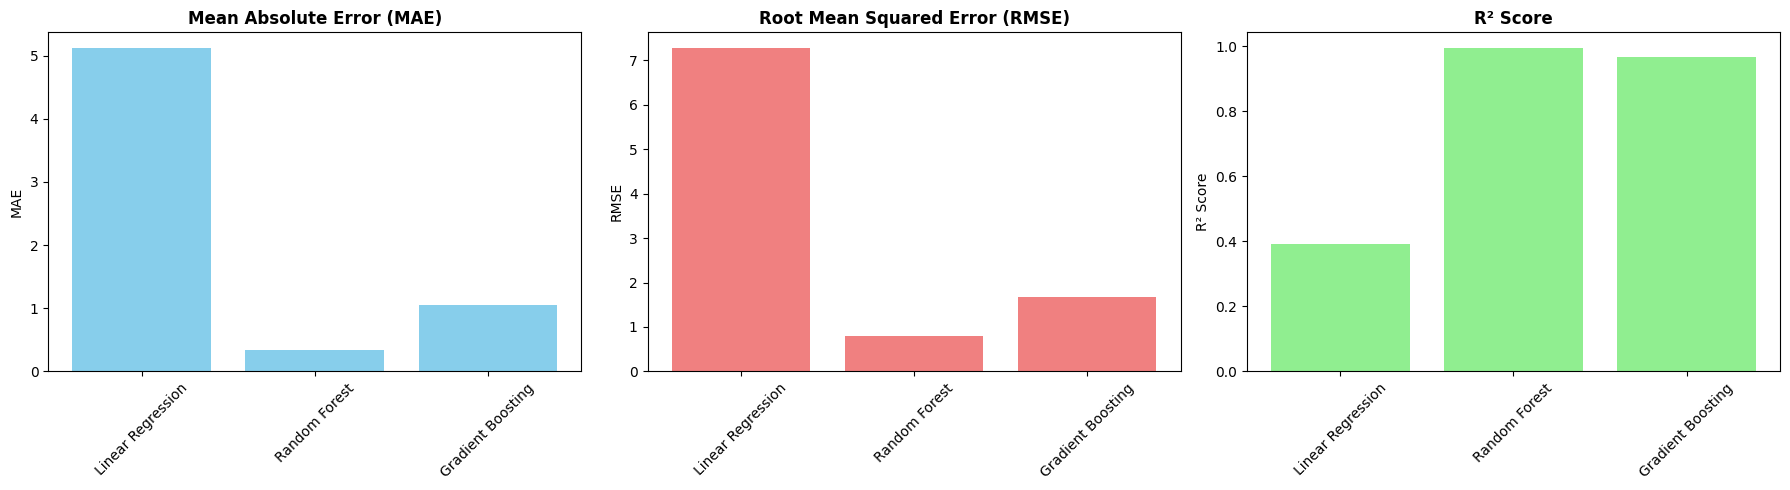

✓ Saved: prediction_accuracy.png


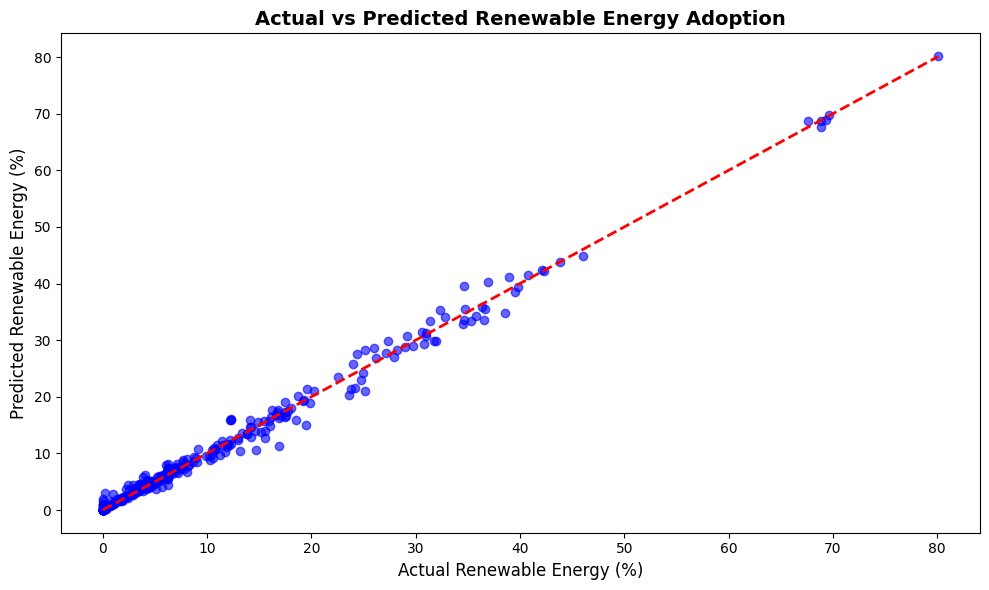

✓ Saved: feature_importance.png


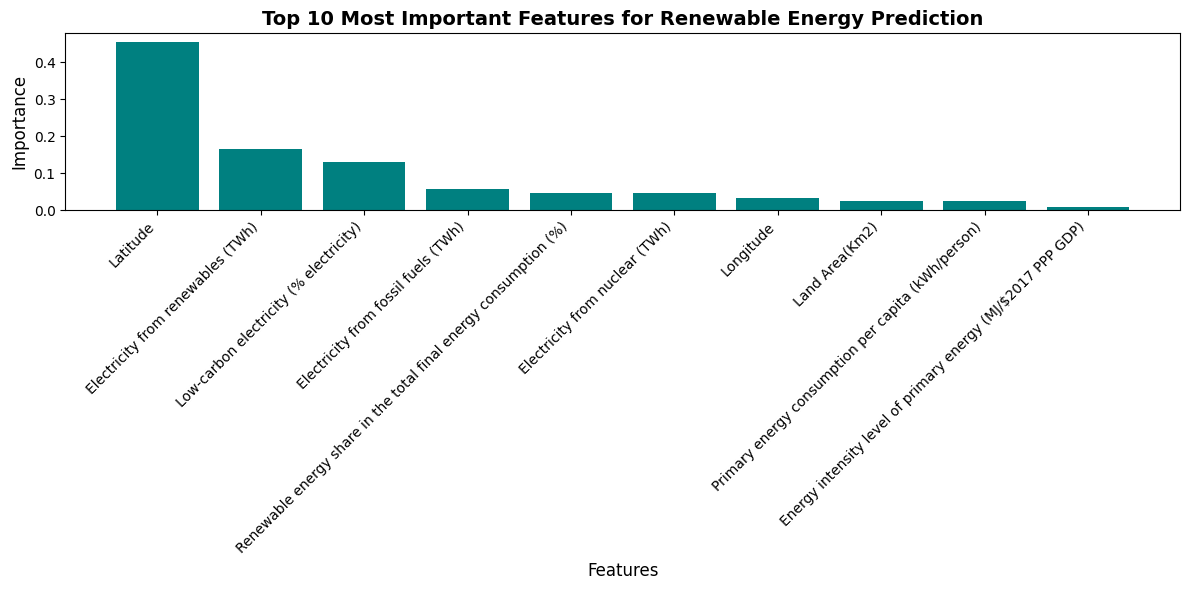


✓ All visualizations saved successfully!

ETHICAL CONSIDERATIONS & BIAS ANALYSIS

        1. DATA BIAS:
           - Historical data may favor developed countries with better reporting
           - Missing data from conflict zones or developing nations could skew predictions
           - Mitigation: Use median imputation and validate across diverse regions

        2. FAIRNESS:
           - Model should not disadvantage countries with less historical renewable investment
           - Predictions should account for different starting points and resources
           - Mitigation: Include GDP, geography, and infrastructure features

        3. SUSTAINABILITY IMPACT:
           - Predictions can guide policy but shouldn't replace human judgment
           - Must consider social, economic, and environmental trade-offs
           - Models should be transparent and explainable to policymakers

        4. DATA PRIVACY:
           - Using aggregated country-level data (no individual privacy co

In [10]:
if __name__ == "__main__":
    main()